# Chapter 3: Graph Data Representation and Processing

## 1 Introduction to Basic Graph Concepts

Node (Vertex): A fundamental unit of a graph representing entities or objects.

Edge (Link): A connection between two nodes, representing relationships.

Directed vs. Undirected Graphs: In directed graphs, edges have a direction (arrows), whereas in undirected graphs, edges have no direction.

## 2 Important Graph Metrics

Node Degree: The number of edges connected to a node.

In-degree: The number of edges directed toward a node (in a directed graph).

Out-degree: The number of edges directed away from a node.

Centrality: Measures the importance of a node in the graph.

Degree Centrality: The number of edges connected to a node.

Betweenness Centrality: Measures how often a node appears on the shortest paths between other nodes.

Shortest Path: The minimum number of edges required to travel between two nodes.

Clustering Coefficient: Measures how close the neighbors of a node are to being a clique (a set of nodes where every pair is connected).

## 3 Graph Representation Models

Adjacency Matrix: A square matrix used to represent a graph, where each element indicates whether pairs of nodes are adjacent.

Adjacency List: A list where each node points to a list of its adjacent nodes.

Sparse Representation: For large graphs, sparse representations are used to save memory, as most of the values in adjacency matrices are zeros.




Adjacency Matrix:

[[0, 1, 0],

 [1, 0, 1],
 
 [0, 1, 0]]

 Adjacency List:
 
0 -> [1]

1 -> [0, 2]

2 -> [1]


## 4 Node and Edge Features

Features can be associated with nodes and edges in a graph. For example:

Node features: Attributes like labels, categories, or properties.

Edge features: Attributes like weights, distances, or types.

## 5 Challenges of Graph Data vs. Tabular Data
Irregular Structure: Unlike tabular data with fixed rows and columns, graph data is highly interconnected and lacks a clear order.
Scalability: Processing large-scale graph data can be computationally expensive.
Complex Relationships: Unlike tabular data, graphs can represent complex, non-Euclidean relationships that need specialized methods.

## 6 Hands-on Example: Processing Real Graph Data

Let's demonstrate how to process real-world graph data using NetworkX and Pandas, focusing on datasets like Cora, PubMed, and Amazon.


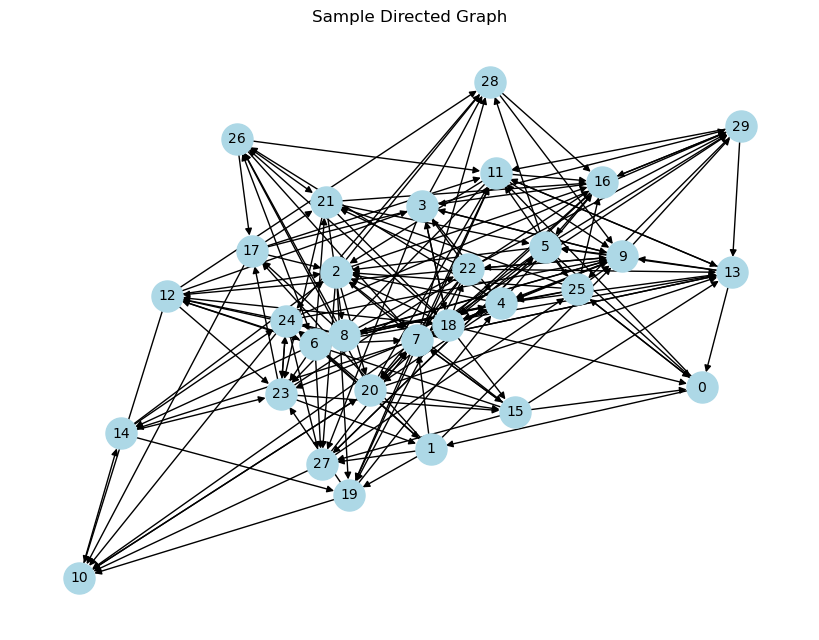

Node Degrees: {0: 8, 1: 9, 2: 15, 3: 10, 4: 14, 5: 13, 6: 13, 7: 21, 8: 10, 9: 17, 10: 9, 11: 14, 12: 11, 13: 13, 14: 7, 15: 10, 16: 13, 17: 9, 18: 16, 19: 9, 20: 13, 21: 10, 22: 12, 23: 13, 24: 12, 25: 12, 26: 9, 27: 11, 28: 8, 29: 11}
In-Degrees: {0: 5, 1: 3, 2: 9, 3: 5, 4: 6, 5: 5, 6: 4, 7: 11, 8: 3, 9: 10, 10: 7, 11: 9, 12: 5, 13: 8, 14: 3, 15: 4, 16: 8, 17: 4, 18: 6, 19: 5, 20: 6, 21: 5, 22: 3, 23: 8, 24: 6, 25: 4, 26: 5, 27: 7, 28: 5, 29: 7}
Out-Degrees: {0: 3, 1: 6, 2: 6, 3: 5, 4: 8, 5: 8, 6: 9, 7: 10, 8: 7, 9: 7, 10: 2, 11: 5, 12: 6, 13: 5, 14: 4, 15: 6, 16: 5, 17: 5, 18: 10, 19: 4, 20: 7, 21: 5, 22: 9, 23: 5, 24: 6, 25: 8, 26: 4, 27: 4, 28: 3, 29: 4}
Degree Centrality: {0: 0.27586206896551724, 1: 0.3103448275862069, 2: 0.5172413793103449, 3: 0.3448275862068966, 4: 0.48275862068965514, 5: 0.4482758620689655, 6: 0.4482758620689655, 7: 0.7241379310344828, 8: 0.3448275862068966, 9: 0.5862068965517241, 10: 0.3103448275862069, 11: 0.48275862068965514, 12: 0.3793103448275862, 13: 0.4

In [1]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load graph data - For example, the Cora citation dataset
# You can download the dataset and load it with Pandas, but here's a simple graph for demonstration.
G = nx.erdos_renyi_graph(30, 0.2, directed=True)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
plt.title('Sample Directed Graph')
plt.show()

# Compute node degree and centrality metrics
degrees = dict(G.degree())
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Display some results
print(f"Node Degrees: {degrees}")
print(f"In-Degrees: {in_degrees}")
print(f"Out-Degrees: {out_degrees}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Betweenness Centrality: {betweenness_centrality}")

# Compute shortest path between two nodes
source_node = 0
target_node = 5
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
print(f"Shortest path between node {source_node} and node {target_node}: {shortest_path}")


## 7. Practical Example: Processing Real-World Graph Data
We'll process graph data from real-world datasets such as Cora, PubMed, and Amazon. We'll use Pandas for data manipulation and NetworkX for graph operations.

Step 1: Load the dataset using Pandas.

Step 2: Convert the data into a graph using NetworkX.

Step 3: Compute basic graph metrics such as degree, centrality, and clustering coefficient.

In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

C:\Users\MASV\anaconda3\Lib\site-packages\torch_geometric\data\dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f) != _repr(self

In [3]:
# Get some basic info about the dataset
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(50*'=')

# There is only one graph in the dataset, use it as new data object
data = dataset[0]  

# Gather some statistics about the graph.
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Is undirected: {data.is_undirected()}')

Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Number of training nodes: 140
Training node label rate: 0.05
Is undirected: True


In [4]:

# تبدیل داده‌های PyTorch Geometric به NetworkX
edge_index = data.edge_index.numpy()
G = nx.Graph()

# اضافه کردن یال‌ها
for i in range(edge_index.shape[1]):
    G.add_edge(edge_index[0, i], edge_index[1, i])

# رسم گراف
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=50, node_color='lightblue', font_size=8)
plt.title('Cora Graph from PyTorch Geometric')
plt.show()

# Basic graph metrics
degree = dict(G.degree())
centrality = nx.degree_centrality(G)
clustering = nx.clustering(G)



In [39]:
# Display results
print("Degree:", degree)


Degree: {633: 3, 0: 3, 1862: 4, 2582: 3, 2: 5, 1: 3, 652: 2, 654: 1, 332: 5, 1454: 1, 1666: 6, 1986: 65, 2544: 1, 3: 1, 1016: 5, 4: 5, 1256: 8, 1761: 7, 2175: 5, 2176: 8, 1629: 3, 5: 3, 1659: 2, 2546: 4, 373: 3, 6: 4, 1042: 23, 1416: 18, 1602: 10, 208: 1, 7: 1, 269: 5, 8: 3, 281: 8, 1996: 5, 723: 2, 9: 2, 2614: 5, 476: 5, 10: 2, 2545: 1, 1655: 12, 11: 2, 1839: 6, 1001: 2, 12: 4, 1318: 3, 2661: 2, 2662: 3, 1701: 74, 13: 2, 1810: 44, 158: 4, 14: 5, 2034: 40, 2075: 8, 2077: 6, 2668: 5, 1090: 7, 15: 4, 1093: 6, 1271: 5, 2367: 14, 970: 5, 16: 4, 1632: 3, 2444: 6, 2642: 4, 24: 7, 17: 5, 927: 3, 1315: 2, 1316: 4, 2140: 5, 139: 8, 18: 5, 1560: 3, 1786: 3, 2082: 2, 2145: 4, 1939: 2, 19: 1, 1072: 30, 20: 5, 2269: 7, 2270: 6, 2374: 1, 2375: 4, 1043: 2, 21: 2, 2310: 2, 39: 7, 22: 5, 1234: 4, 1702: 10, 1703: 17, 2238: 11, 2159: 3, 23: 1, 201: 7, 598: 33, 1636: 5, 2139: 4, 2141: 4, 1301: 6, 25: 4, 1344: 5, 2011: 3, 2317: 3, 99: 6, 26: 5, 122: 4, 123: 4, 2454: 3, 2455: 4, 606: 6, 27: 4, 2360: 4, 2578

In [35]:
print("Centrality:", centrality)

Centrality: {633: 0.0011082379017362393, 0: 0.0011082379017362393, 1862: 0.0014776505356483192, 2582: 0.0011082379017362393, 2: 0.001847063169560399, 1: 0.0011082379017362393, 652: 0.0007388252678241596, 654: 0.0003694126339120798, 332: 0.001847063169560399, 1454: 0.0003694126339120798, 1666: 0.0022164758034724785, 1986: 0.024011821204285185, 2544: 0.0003694126339120798, 3: 0.0003694126339120798, 1016: 0.001847063169560399, 4: 0.001847063169560399, 1256: 0.0029553010712966383, 1761: 0.0025858884373845584, 2175: 0.001847063169560399, 2176: 0.0029553010712966383, 1629: 0.0011082379017362393, 5: 0.0011082379017362393, 1659: 0.0007388252678241596, 2546: 0.0014776505356483192, 373: 0.0011082379017362393, 6: 0.0014776505356483192, 1042: 0.008496490579977835, 1416: 0.0066494274104174364, 1602: 0.003694126339120798, 208: 0.0003694126339120798, 7: 0.0003694126339120798, 269: 0.001847063169560399, 8: 0.0011082379017362393, 281: 0.0029553010712966383, 1996: 0.001847063169560399, 723: 0.0007388252

In [37]:
print("Clustering Coefficient:", clustering)

Clustering Coefficient: {633: 0.3333333333333333, 0: 0.3333333333333333, 1862: 0.16666666666666666, 2582: 0.3333333333333333, 2: 0, 1: 0, 652: 0, 654: 0, 332: 0.1, 1454: 0, 1666: 0.13333333333333333, 1986: 0.008173076923076924, 2544: 0, 3: 0, 1016: 0.5, 4: 0.7, 1256: 0.4642857142857143, 1761: 0.23809523809523808, 2175: 0.7, 2176: 0.39285714285714285, 1629: 0.3333333333333333, 5: 0.3333333333333333, 1659: 1.0, 2546: 0, 373: 0.6666666666666666, 6: 0.3333333333333333, 1042: 0.04743083003952569, 1416: 0.0196078431372549, 1602: 0.06666666666666667, 208: 0, 7: 0, 269: 0, 8: 0, 281: 0, 1996: 0.2, 723: 1.0, 9: 1.0, 2614: 0.1, 476: 0, 10: 0, 2545: 0, 1655: 0.07575757575757576, 11: 1.0, 1839: 0.06666666666666667, 1001: 1.0, 12: 0.5, 1318: 0.6666666666666666, 2661: 1.0, 2662: 0.6666666666666666, 1701: 0.006293965198074787, 13: 0, 1810: 0.014799154334038054, 158: 0.16666666666666666, 14: 0.3, 2034: 0.01282051282051282, 2075: 0.25, 2077: 0.2, 2668: 0.4, 1090: 0.5238095238095238, 15: 1.0, 1093: 0.6,